# Introduccion a sympy
El modulo sympy es un sistema de computacion simbolica que nos permite realizar calculos matematicos que pueden contener variables sin evaluar. Esto representa una ventaja porque algunas veces queremos evaluar expresiones exactas sin obtener una aproximacion numerica.

In [71]:
from sympy import *
init_printing(use_latex=True)

In [103]:
# Creacion de variables simbolicas
x, y, z, t = symbols('x y z t')

In [73]:
# Crear una expresion matematica a partir de las variables
expr = x + 2*y
expr

In [74]:
# Manipulacion de la expresion matematica
x * expr

Como se vio anteriormente, no siempre sympy simplifica las operaciones matematicas, esto se debe a que por lo general es mas conveniente trabajar con una version factorizada. Sin embargo, es posible simplificar o factorizar las expresiones como se muestra a continuacion.

In [75]:
# Expancion de una expresion
expanded_expr = expand(x * expr)
expanded_expr

In [76]:
# Factorizacion de una expresion
factor(expanded_expr)

## Manipulacion de funciones
Se pueden manipular las funciones simbolicas para obtener:

* Derivadas
* Integrales
* Transformadas

### Solucion de ecuaciones de grado n

In [77]:
# Segundo grado
eq1 = 2*x**2 + 8*x -1
eq1

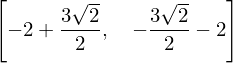

In [78]:
solve(eq1)

In [79]:
# Quinto grado
eq2 = x**5 + 3*x**4 - x**3 + 0.5*x**2 + x - 1
eq2

In [80]:
solve(eq2)

## Calculo simbolico

Tomaremos como ejemplo la funcion:

$$ f(x) = e^{x}sin(x)$$

In [81]:
f = sin(x) * exp(x)
f

### Limites

Se pueden obtener el limite de una funcion con la instruccion *limit*.

$$lim_{x->0} \frac{sin(x)}{x}$$

In [82]:
limit(sin(x)/x, x, 0)

### Derivadas

Se puede obtener la derivada de orden N de una funcion. 

La funcion que nos permite realizar esto es mediante *diff* donde recibe como argumento la funcion a derivar y con respecto a que variable se debe obtener. Se colocan tantas variables como el orden de la derivada que deseamos.

In [83]:
# Primer derivada
diff_f = diff(f, x, 1)
diff_f

In [84]:
# Segunda derivada
diff(f, x, 2)

In [85]:
# Tercera derivada
diff(f, x, 3)

In [86]:
# Evaluar la primer derivada cuando x = 1 (simbolicamente)
diff_f.subs(x, 1)

In [116]:
# Evaluar la primer derivada cuando x = 1 (numericamente) con 4 digitos
diff_f.subs(x, 1).evalf(4)

### Integrales

La integral de una funcion se obtiene mediante la instruccion *integrate* donde recibe como argumento la funcion a integrar y la variable con respecto a la cual se integra. 

Al igual que en el caso de la derivada, si queremos obtener la integral de orden N, debemos colocar N veces la variable de interes.

Las integrales que se pueden obtener son:

* Indefinidas
* Definidas

#### Integrales indefinidas

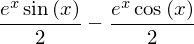

In [88]:
# Primer integral
int_f = integrate(f, x)
int_f

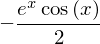

In [89]:
# Segunda integral
integrate(f, x, x)

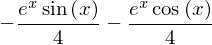

In [90]:
# Tercera integral
integrate(f, x, x, x)

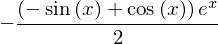

In [91]:
# Factorizacion de la primera integral
factor(int_f)

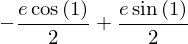

In [92]:
# Evaluar la primer integral como una expresion simbolica
int_f.subs(x, 1)

In [93]:
# Evaluar la segunda integral como una expresion numerica, con 4 decimales
int_f.subs(x, 1).evalf(4)

#### Integrales definidas

Obtendremos la integral de la funcion $ e^{-2x} $ con distintos limites de integracion.

$\int_{0}^{\infty}e^{-2x}dx $ 

In [94]:
integrate(exp(-2*x), (x, 0, oo))

$\int_{-\infty}^{\infty}e^{-2x}dx $ 

In [95]:
integrate(exp(-2*x), (x, -oo, oo))

Tambien es posible integrar una funcion **multivariable**. Tomaremos como ejemplo a la funcion:

$ 2x^2 + 3y^3 $

In [110]:
fxy = 2*x**2 + 3*y**3
fxy

$ \int_{0}^{3} (2x^2 + 3y^3) dx $

In [117]:
# Integral definida con respecto a x
integrate(fxy, (x, 0, 3))

#### Integrales sin evaluar
Se puede crear un objeto del tipo integral con la instruccion *Integral* que consiste en la expresion simbolica. Esta expresion se puede evaluar posteriormente con el metodo *doit()*.

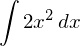

In [128]:
# Indefinida
expr_inti = Integral(2*x**2)
expr_inti

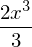

In [129]:
# Evaluar integral indefinida
expr_inti.doit()

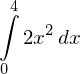

In [130]:
# Definida
expr_intd = Integral(2*x**2, (x, 0, 4))
expr_intd

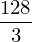

In [134]:
# Evaluar la integral definida
expr_intd.doit()

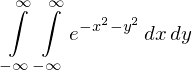

In [142]:
# Multivariable
expr_int_mv = Integral(exp(-x**2-y**2), (x, -oo, oo), (y, -oo, oo))
expr_int_mv

In [144]:
expr_int_mv.doit()

### Expansion de series
Para calcular la expansion en series de una funcion alrededor del punto $x=x_0$ se usa el metodo *series(x0, n)*, donde n es el numero que indica el orden del mayor exponente $x^n$.

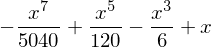

In [167]:
sin(x).series(x, 0, 8).removeO()

### Ecuaciones diferenciales

En esta seccion se solucionaran ecuaciones diferenciales de coeficientes constantes, que son de la forma:

$$ ay''(t) + by'(t) + c = f(t) $$

#### Ejemplo con ecuacion diferencial homogenea

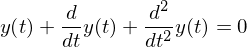

In [97]:
# Una igualdad simbolica se especifica mediante la instruccion --> Eq()
a, b, c = 1, 1, 1
y = Function('y')
eq_diff = Eq(a*y(t).diff(t, t) + b*y(t).diff(t) + c*y(t), 0)
eq_diff

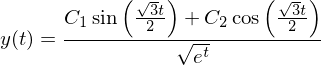

In [98]:
# Obtener la solucion de la ecuacion diferencial
# sin condiciones iniciales
solution = dsolve(eq_diff, y(t))
solution

In [99]:
solution.subs(t, 0)

#### Ejemplo con ecuacion diferencial no homogenea

In [177]:
type(solution)

sympy.core.relational.Equality

## Graficacion de funciones

In [181]:
func1 = exp(-x)*sin(4*x)

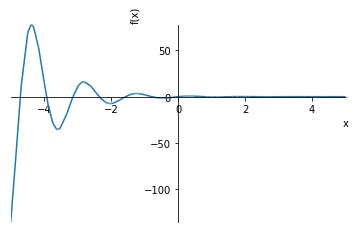

In [182]:
plot(func1, (x, -5, 5))